# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [1]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [2]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [132]:
import networkx as nx
from IPython.display import Image, display




# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)         
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
            
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


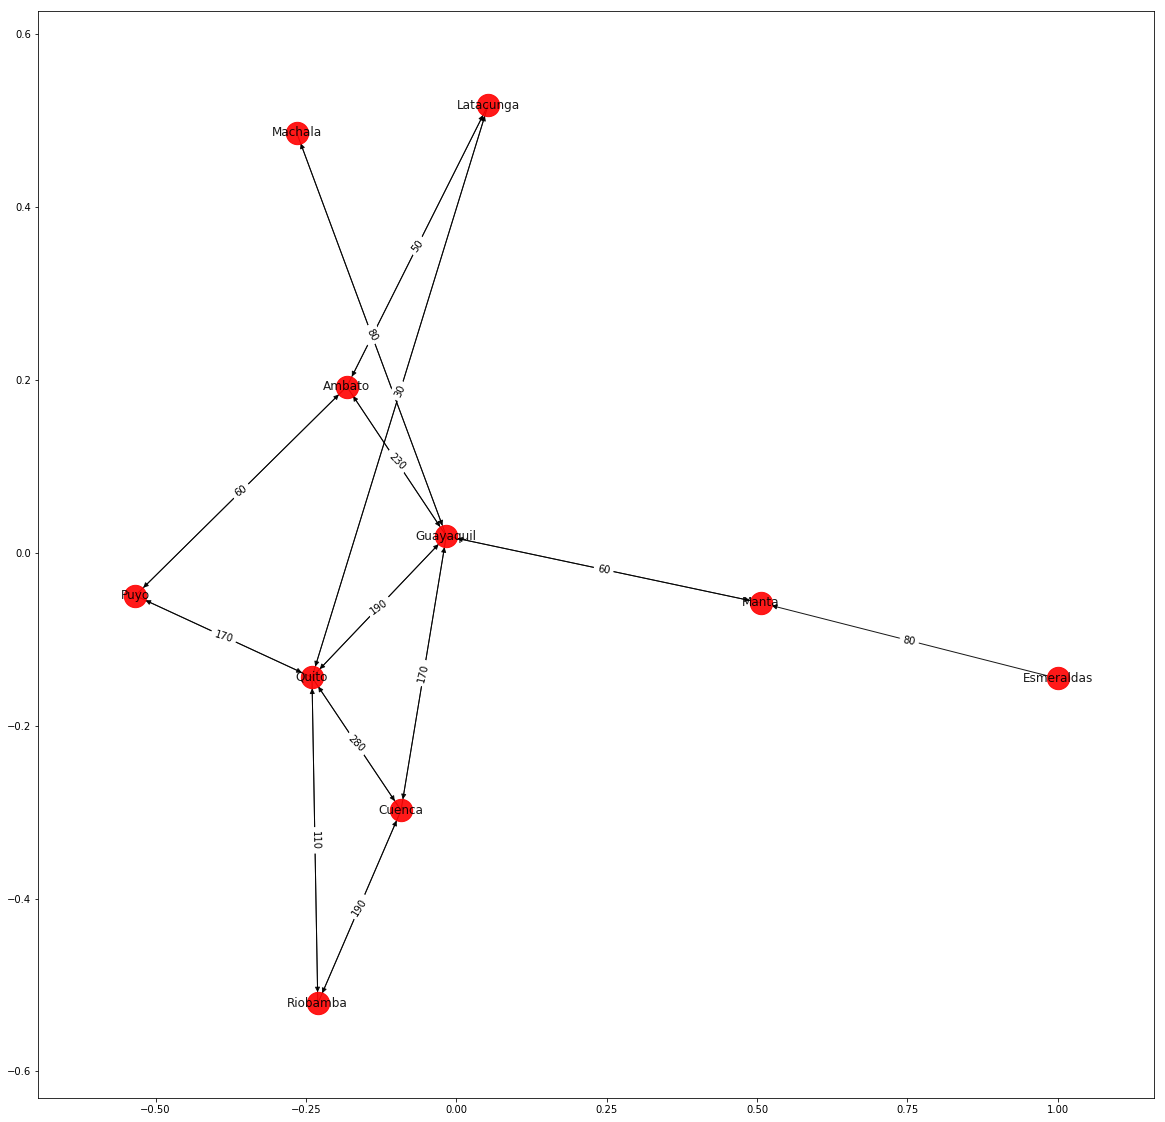

In [133]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
 
def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos) 
    for valor, listaValor in datos.items():
        for a in listaValor:  
            graf.add_edge(valor,a,size=250)
            graf.add_edge(valor,a,weight=datos[valor][a])
    
    plt.figure(figsize=(20,20)) 
    #nx.draw_networkx(graf, node_color = 'yellow', with_label = True, node_size=2000)
    #plt.show()
    pos=nx.spring_layout(graf)
    edge_labels = nx.get_edge_attributes(graf,'weight')   
    nx.draw_networkx_edge_labels(graf, pos, edge_labels = edge_labels) 
    nx.draw_networkx(graf, pos, node_color = "red", node_size=500, alpha=0.9, labels={node:node for node in graf.nodes()})
    plt.show()


graficar(connections)


<img src="mapapolicias.png">

# Calculo del factor de ramificacion

para realizar el clculo del factor de ramificacion para el problema de los Policias tomamos los mismos como nodos es decir para nuestro caso tenemos 14 entidades pertenecientes a la Policia del Ecuadors y nuestra casa como punto de partida que serian los nodos

n = 15

y la profundidad seran los niveles en los ques se procedio a realizar el arbol

d = 6

siguiendo la formula del calculo del factor de ramificacion obtenemos que para este problema 

n=((b^(d+1)-1)/(b-1)

15=((b^(7)-1)/(b-1)

b = 1.248

luego porcedemos q calcular el factor donde dividimos el numero de nodos para la profundida

f(r)=n/d
f(r)=15/6
f(r)=2.15

Complejidad temporal: el peor de los casos se dará cuando encuentre el estado meta en el último nivel de la profundidad de la última rama del árbol. De darse esta situación, el algoritmo termina expandiendo todas las ramas y estados, dando como resultado un valor O(b^n).

O(b^n)
2.15 ^ 15 = 96.956,4930...

Complejidad espacial: el peor de los casos se dará cuando se expanda estados sin eliminar sus hijos o sucesores. Para un factor de ramificación b se almacenarán m estados con profundidad n, por lo que tendremos O(nb) estados.

O(nb)
15 * 2.15 = 32.25

In [134]:
# Implementar
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            Grafo.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                #Grafo.add_edge(node.data,child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)         
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections2 = {
        'casa': {'Policia de Narcoticos':2.1, 'Departamento de UPC':2.2},
        'Departamento de UPC': {'casa':2.2},
        'Policia de Narcoticos': {'casa':2.1, 'Centro de salud N24 Policia':3.1},
        'Centro de salud N24 Policia': {'Gobernacion del azuay':2.1, 'Policia Nacional Zona6':1.8, 'Cooperativa Policia Nacional':1.7},
        'Policia Nacional Zona6':{'Centro de salud N24 Policia':1.8},
        'Cooperativa Policia Nacional':{'Centro de salud N24 Policia':1.7},
        'Gobernacion del azuay': {'Intendencia General de Policia':0.5, 'Policia Nacional El sagrario':0.65},
        'Intendencia General de Policia':{'Gobernacion del azuay':0.5},
        'Policia Nacional El sagrario': {'Subzona de policia azuay N1':1.2, 'UPC terminal terrestres':1.4, 'UPC el paraiso':3.3},
        'Subzona de policia azuay N1':{'Policia Nacional El sagrario':1.2},
        'UPC terminal terrestres': {'Policia Judicial del Azuay':0.75, 'UPC totoracocha':1.8},
        'Policia Judicial del Azuay':{'UPC terminal terrestres':0.75},
        'UPC totoracocha':{'UPC terminal terrestres':1.8},
        'UPC el paraiso':{'Unidad de Policia Comunitaria':1.2},
        'Unidad de Policia Comunitaria':{'UPC el paraiso':1.2}
    }

    init_state = 'casa'
    solution = 'UPC totoracocha'
    solution_node = search_costo_solucion(connections2, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
            
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['casa', 'Policia de Narcoticos', 'Centro de salud N24 Policia', 'Gobernacion del azuay', 'Policia Nacional El sagrario', 'UPC terminal terrestres', 'UPC totoracocha']
Costo total: 11.150000000000002


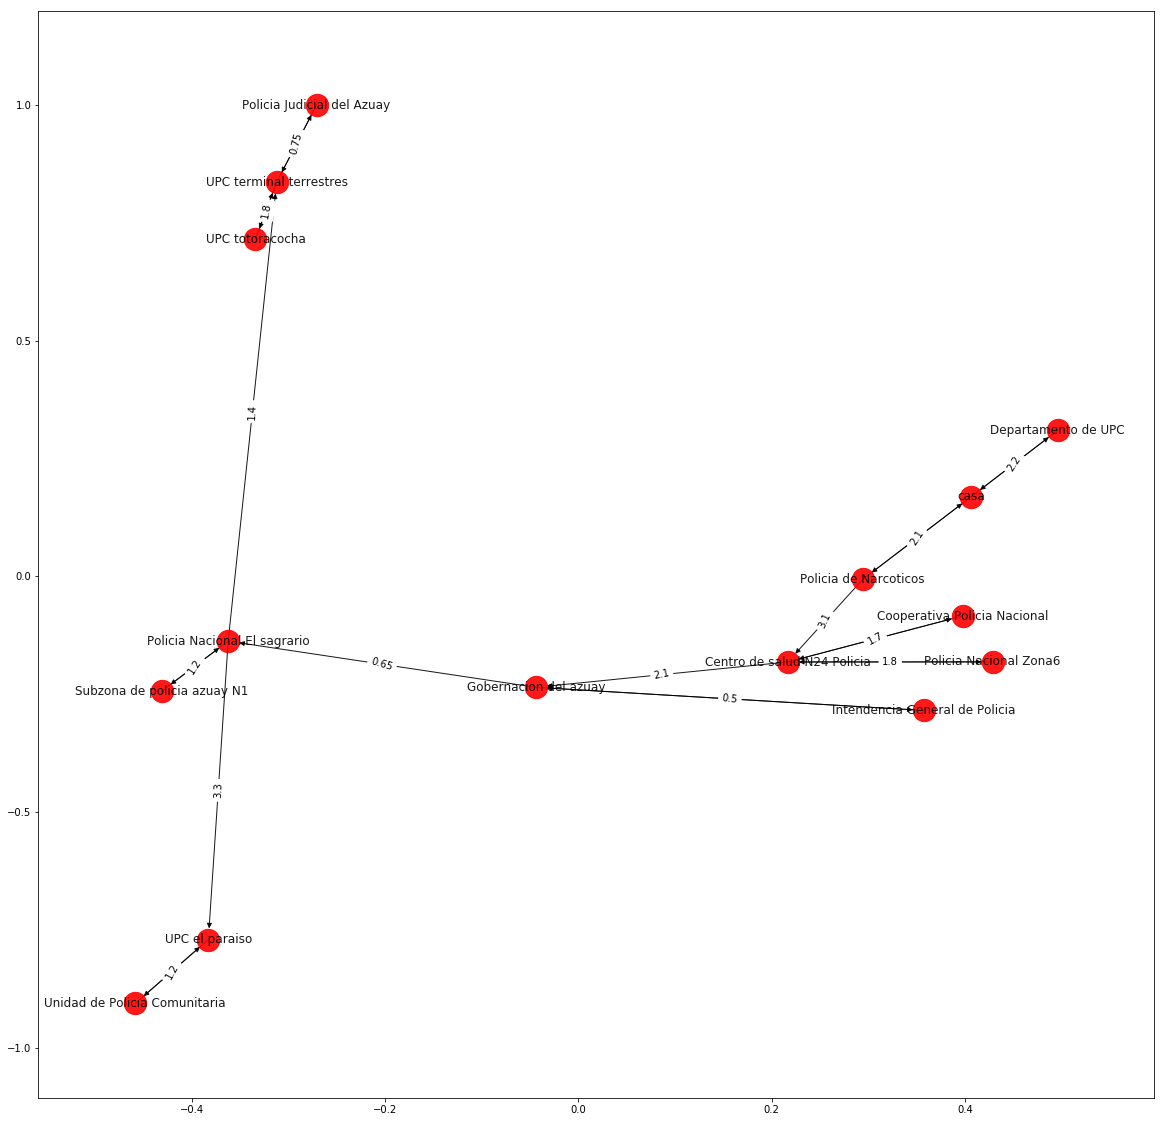

In [121]:
graficar(connections2)

# Conclusiones

<img src="mapacoronaav.png">

# Referencia de los DATOS

Los datos para la construccion de la ruta de contagio se tomo de la pagina del Servicio Nacional de Gestión de Riesgos y Emergencias
https://www.gestionderiesgos.gob.ec/informes-de-situacion-covid-19-desde-el-13-de-marzo-del-2020/?fbclid=IwAR1a3aSy0BawxP7yT7-xkQd9CPck7mODYqcum3HxOKBfvvh0hZwdzjoEvkg

Infografia  No. 001 COVID 19_13032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/1INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-13032020_15H.pdf

Infografia No. 003 COVID 19_14032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/3-INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-14032020-15h00-1.pdf

Infografia No. 006 COVID 19_16032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/6INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-16032020-09h00.pdf


Infografia No.010 COVID 19_18032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/10INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-18032020-05-am.pdf


Infografia No. 013 COVID 19_19032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/13INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-19032020-16H00.pdf


Infografia No. 015 COVID 19_20032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/15INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-20032020-17H00-V2.pdf


Infografia No. 016 COVID 19_21032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/16INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-21032020-10h00.pdf


Infografia No. 019 COVID 19_23032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-23032020-10H00-1.pdf



Infografia No. 021 COVID 19_24032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-24032020-17h00.pdf


Infografia No. 022 COVID 19_25032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-25032020-10h00-v2.pdf


Infografia No. 022 COVID 19_25032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-25032020-10h00-v2.pdf


Infografia No. 024 COVID 19_25032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-26032020-10h00-1.pdf


Infografia No. 028 COVID 19_28032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-28032020-10h00.pdf


Infografia No. 034 COVID 19_31032020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/03/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-31032020-10h00-1.pdf



Numeros de casos al 11-04-2020
https://www.gestionderiesgos.gob.ec/wp-content/uploads/2020/04/INFOGRAFIA-NACIONALCOVI-19-COE-NACIONAL-11042020-07h00.pdf

In [160]:
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            Grafo.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                #Grafo.add_edge(node.data,child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)         
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections3 = {
        'inicio': {'los Rios':227},
        'los Rios': {'inicio': 227, 'Guayas':5290, 'Quito':606, 'Sucumbios':33},
        'Quito': {'los Rios':227},
        'Sucumbios': {'los Rios':227},
        'Guayas': {'los Rios':227, 'Azuay':154, 'Manabi':204},
        'Manabi': {'Guayas':5290},
        'Azuay': {'Guayas':5290, 'El Oro':149, 'Morona Santiago':19, 'Bolivar':33},
        'El Oro': {'Azuay':154, 'Loja':59},
        'Loja': {'El Oro':149},
        'Morona Santiago': {'Azuay':154, 'Cañar':94},
        'Bolivar': {'Chimborazo':65, 'STO de los TSachilas':55, 'Imbabura':32},
        'Imbabura': {'Bolivar':33},
        'STO de los TSachilas': {'Bolivar':33},
        'Chimborazo': {'Bolivar':33},
        'Cañar': {'Morona Santiago':19, 'Santa Elena':74},
        'Santa Elena': {'Cañar':94, 'Esmeraldas':31},
        'Esmeraldas': {'Santa Elena':74, 'Cotopaxi':36, 'Tungurahua':36},
        'Tungurahua':{'Esmeraldas':31},
        'Cotopaxi': {'Esmeraldas':31, 'Islas Galapagos':11},
        'Islas Galapagos': {'Cotopaxi':36, 'Carchi':23},
        'Carchi': {'Islas Galapagos':11, 'Pastaza':13},
        'Pastaza':{'Carchi':23, 'Zamora Chinchipe':4},
        'Zamora Chinchipe':{'Pastaza':13, 'Orellana':5},
        'Orellana': {'Zamora Chinchipe':4, 'Napo':4},
        'Napo': {'Orellana':5}
    }

    init_state = 'Sucumbios'
    solution = 'Napo'
    solution_node = search_costo_solucion(connections3, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
            
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Sucumbios', 'los Rios', 'Guayas', 'Azuay', 'Morona Santiago', 'Cañar', 'Santa Elena', 'Esmeraldas', 'Cotopaxi', 'Islas Galapagos', 'Carchi', 'Pastaza', 'Zamora Chinchipe', 'Orellana', 'Napo']
Costo total: 5985


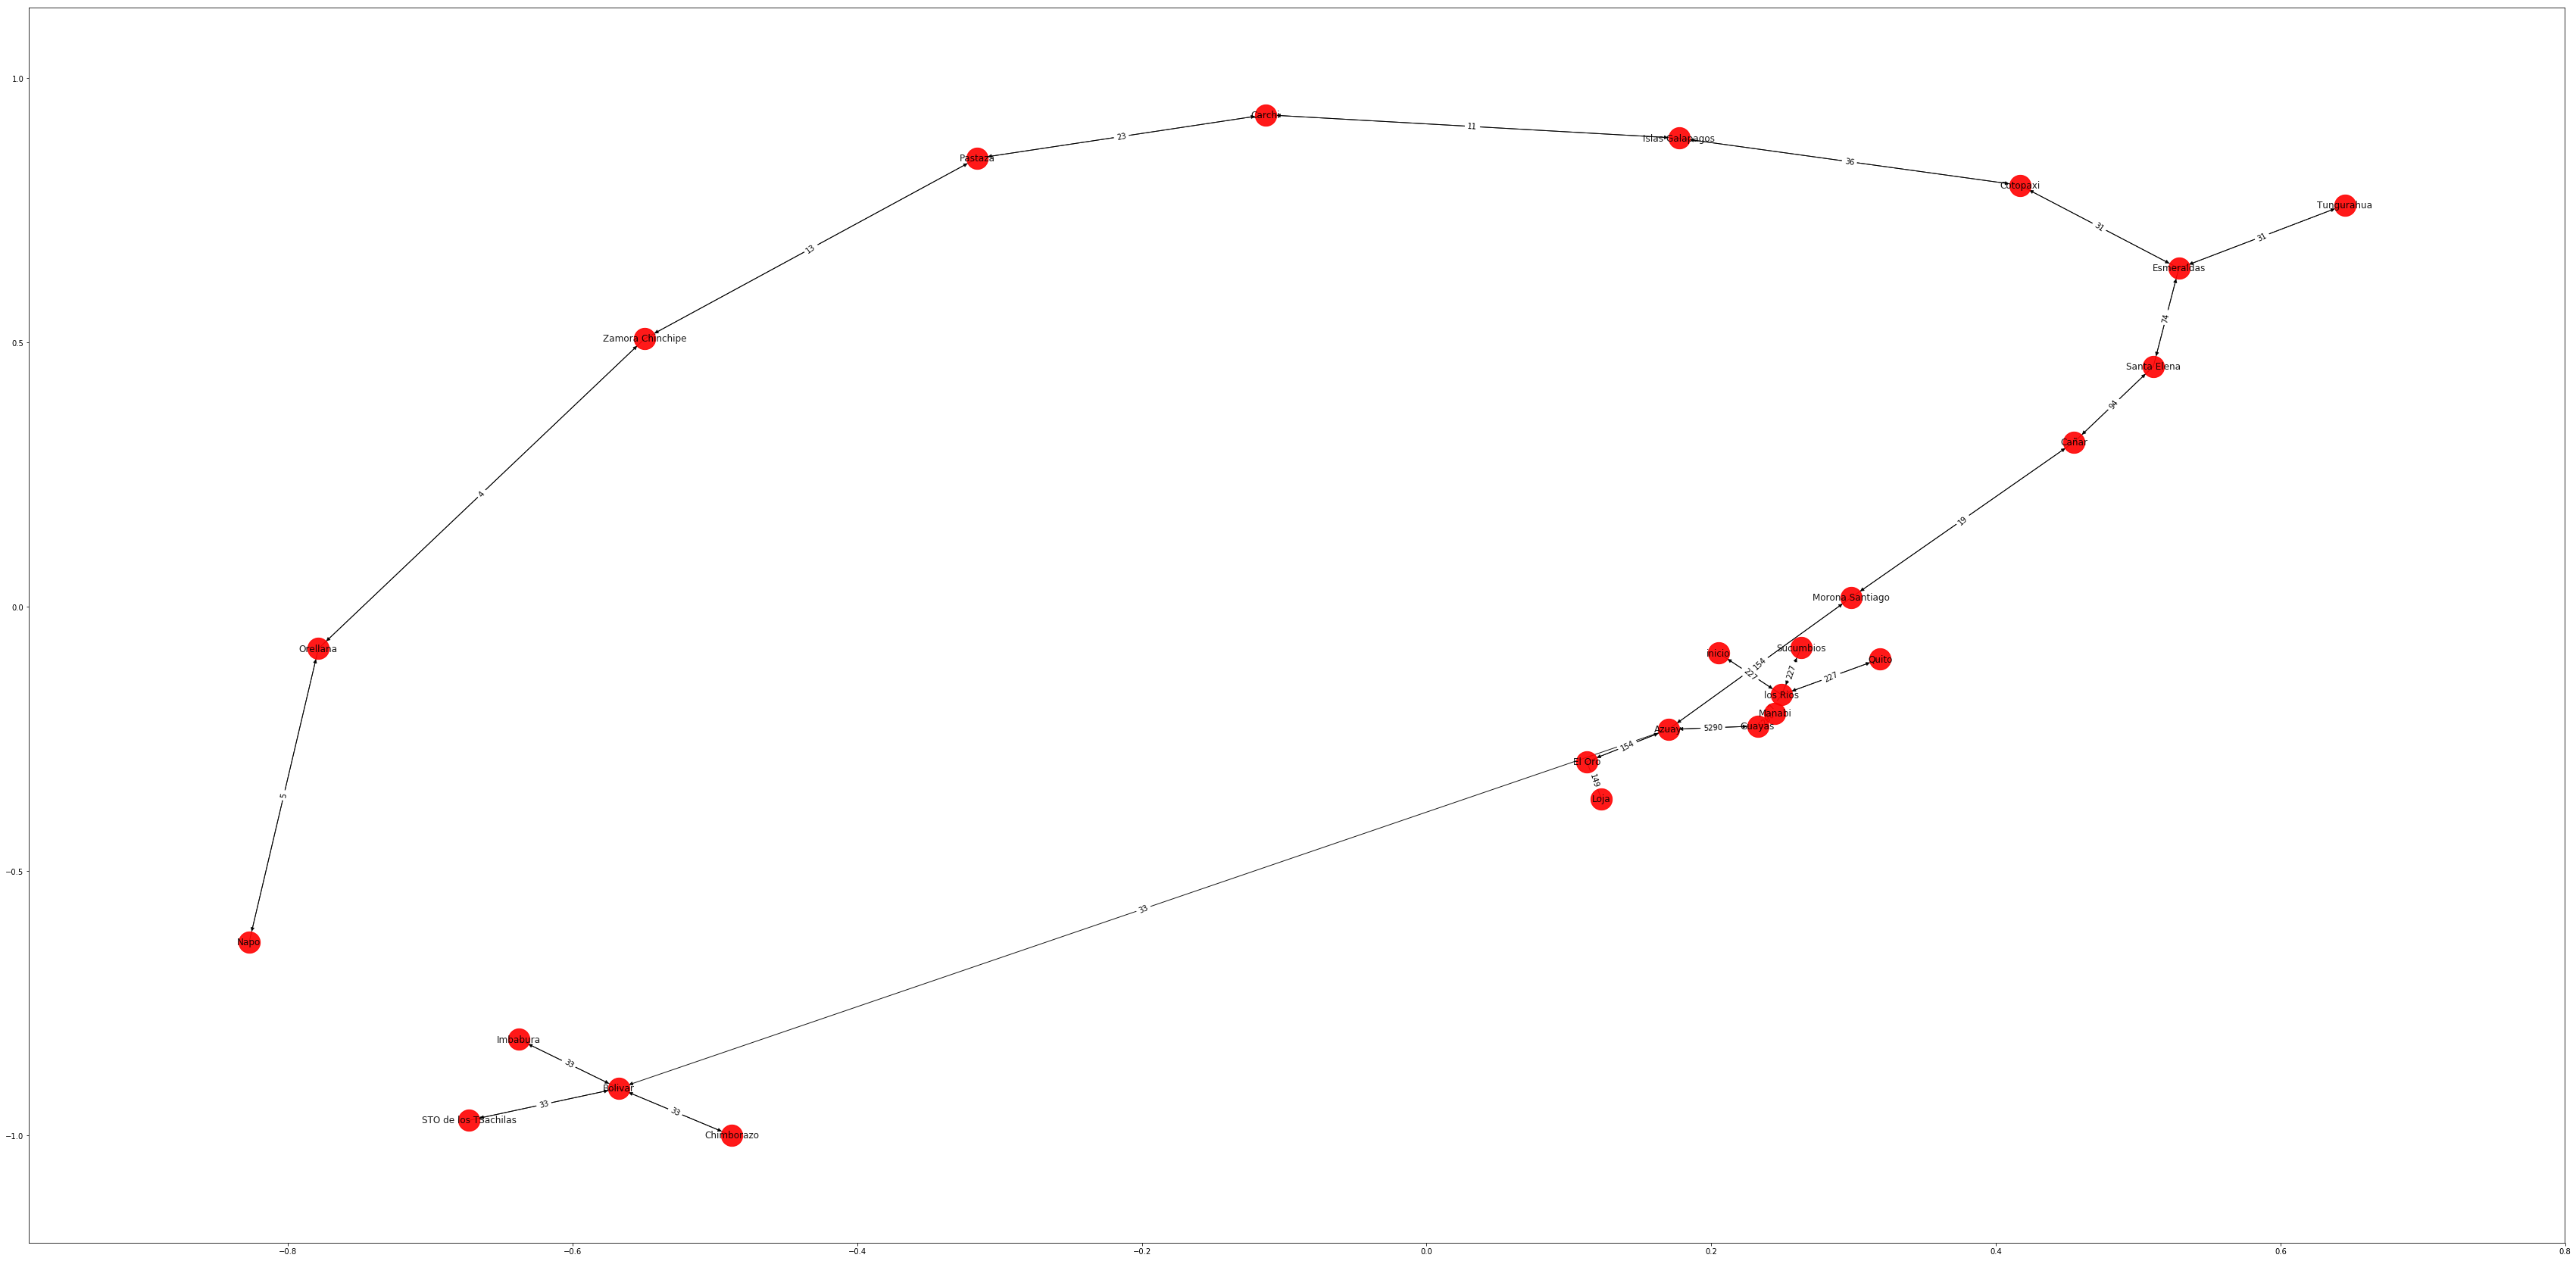

In [176]:
def graficar2(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos) 
    for valor, listaValor in datos.items():
        for a in listaValor:  
            graf.add_edge(valor,a,size=250)
            graf.add_edge(valor,a,weight=datos[valor][a])
    
    plt.figure(figsize=(60,30)) 
    #nx.draw_networkx(graf, node_color = 'yellow', with_label = True, node_size=2000)
    #plt.show()
    pos=nx.spring_layout(graf)
    edge_labels = nx.get_edge_attributes(graf,'weight')   
    nx.draw_networkx_edge_labels(graf, pos, edge_labels = edge_labels) 
    nx.draw_networkx(graf, pos, node_color = "red", node_size=800, alpha=0.9, labels={node:node for node in graf.nodes()})
    plt.show()
    
graficar2(connections3)